# Kerr resonators

Kerr resonator simulations. Please note that the code is in development and has not been tested. The relevant article for the theory can be found in:

*Bartolo, Nicola, et al. "Exact steady state of a Kerr resonator with one-and two-photon driving and dissipation: Controllable Wigner-function multimodality and dissipative phase transitions." Physical Review A 94.3 (2016): 033841.*

Correlation and Wigner functions are defined using the following:

$$ F_m(f, g, c) = (i\sqrt{g})^m \bigg[. _2F_1(-m, -c -i\frac{f}{\sqrt{g}};-2c;2)\bigg]$$
Here, $_2F_1$ is the Gauss hypergeometric function defined for $|z|\le1$:
$$_2F_1(a, b, c, z)=\sum_{n=0}^\inf \frac{(a)_n (b)_n}{(c)_n} \frac{z^n}{n!} $$
The normalization is given by:
$$N = \sum_{m=0}^\inf \frac{2^m}{m!} |F_m(f, g,c)|^2$$
Once we have this we can get the correlation function:
$$<\hat a^{\dagger i}\hat a^j> = \frac{1}{N}\sum_{m=0}^{inf}F_{m+j}(f, g, c) F^*_{m+i}(f, g, c)$$
and the Wigner function as:
$$W(z)=\frac{2}{\pi N}\bigg|\sum_{m=0}^{\inf} \frac{(2z^*)^m}{m!}F_m(f, g, c)\bigg|^2e^{-2|z|^2}$$

In [ ]:
from qutip.models.kerr import Kerr
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
U = np.arange(-6, 6, 1)
delta = 28*U
gam = 0.1*U
eta = 0.1*U

f = 1/(U - eta*(1j))
g = 1/(U - eta*(1j))
c = (delta + (1j*gam)/2.)/(U - eta*(1j))

In [3]:
system = Kerr(f[0], g[0], c[0])

In [4]:
print("Normalization", system.normalization())

Normalization 1.01190474292


In [5]:
x = y = np.arange(-6, 6, 0.1)

In [6]:
X, Y = np.meshgrid(x, y)
Z = system.wigner(X+(1j)*Y)

Wigner plot for f = (-0.16501650165016502-0.016501650165016504j) 
 g = (-0.16501650165016502-0.016501650165016504j) 
 c = (27.717821782178216+2.8217821782178225j)


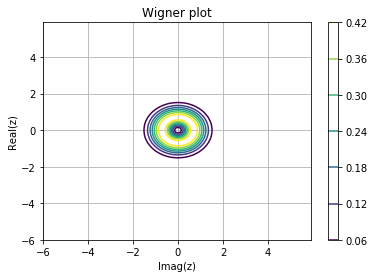

In [7]:
print("Wigner plot for f = {} \n g = {} \n c = {}".format(f[0], g[0], c[0]))
plt.contour(X, Y, Z)
plt.title("Wigner plot")
plt.ylabel("Real(z)")
plt.xlabel("Imag(z)")
plt.grid()
plt.colorbar()
plt.show()